<a href="https://colab.research.google.com/github/BrockDSL/Analyzing_Web_Archives/blob/main/Analyzing_Archives_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![dsl_logo.png](https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/dsl_logo.png)

# Analyzing Web Archives

Welcome to the Digital Scholarship Lab Level Analyzing Web Archives workshop. The following notebook provides an investigation into a subset of the [COVID-19 in Niagara Data set](https://archive-it.org/collections/13781). We'll be loading up a collection of web pages provided by different municipalities in the niagara region:

- niagararegion.ca
- notl.com
- stcatharines.ca
- niagarafalls.ca
- lincoln.ca
- forterie.ca
- grimsby.ca
- portcolborne.ca
- thorold.ca
- welland.ca
- westlincoln.ca
- wainfleet.ca
- pelham.ca


## How this notebook works

This webpage is a Google Colab notebook and is comprised of different *cells*. Some are code cells that run Python snippets. To works through these cells simply click on the triangle _run_ button in each cell.


In [189]:
#Loading Libraries
# Click the run button to the left to start up this notebook

import pandas as pd
import gdown
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from google.colab import files


print("Libraries loaded. Ready to proceed.")


Libraries loaded. Ready to proceed.


## Loading the data

We've processed the data by creating a *CSV* file of the webpages from the domains above that are found in the archive. That way we can some text analysis on it directly. Here we read it in and show some basic information about it.

In [4]:
#File is so big we need to download it as a zip file, then uncompress it

gdown.download("https://drive.google.com/u/0/uc?id=1oKNphdZkuNfeh-beuTkcIBo_EFLWO9zX&export=download","municipal_data.csv.gz",quiet=False)
!gunzip municipal_data.csv.gz
archive_data = pd.read_csv("municipal_data.csv")
#get rid of some uneeded cols
del(archive_data['Unnamed: 0'])
del(archive_data['index'])
del(archive_data['mime_type_web_server'])
del(archive_data['mime_type_tika'])
del(archive_data['language'])
archive_data['crawl_date']= pd.to_datetime(archive_data['crawl_date'],format='%Y-%m-%d')

Downloading...
From: https://drive.google.com/u/0/uc?id=1oKNphdZkuNfeh-beuTkcIBo_EFLWO9zX&export=download
To: /content/municipal_data.csv.gz
100%|██████████| 51.3M/51.3M [00:00<00:00, 76.6MB/s]


'municipal_data.csv.gz'

## General information about the dataset

Number of total records in dataset

In [80]:
print(len(archive_data))

61160


Domains information captured in dataset:

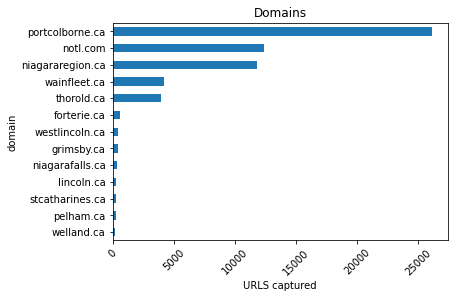

In [134]:
ax = archive_data.groupby("domain")["url"].count().sort_values().plot(kind='barh')
ax.set_title("Domains")
ax.set_label("Number of captures")
ax.set_xlabel("URLS captured")
plt.xticks(rotation=45)
plt.show()

## Specific City


In [220]:
#@title Specific City Data
#@markdown Pick a city to see data just from it
Selected = "welland.ca" #@param ["notl.com", "stcatharines.ca", "niagarafalls.ca","lincoln.ca","forterie.ca","grimsby.ca","portcolborne.ca","thorold.ca","welland.ca","westlincoln.ca","wainfleet.ca", "pelham.ca"] {allow-input: true}
#@markdown How many URLs to show
Count = 10  #@param {type: "slider", min: 1, max: 50}

#@markdown Be sure to hit the *run* button to confirm your selection

city_data = archive_data[archive_data.domain == Selected]
city_data.groupby("url").count().sort_values(by="crawl_date",ascending=False)[0:Count]

,crawl_date,domain,content,length,v_pos,v_neg,v_neu,v_comp
url,,,,,,,,
https://www.welland.ca/hottopics/COVID-19.asp,54,54,54,54,54,54,54,54
https://www.welland.ca/ddmenu-source.html,42,42,42,42,42,42,42,42
https://www.welland.ca//transit,8,8,8,8,8,8,8,8
https://www.welland.ca/Templates/footer.asp,8,8,8,8,8,8,8,8
https://www.welland.ca/Transit/TransitNotices.asp,5,5,5,5,5,5,5,5
https://yourchannel.welland.ca/,5,5,5,5,5,5,5,5
https://www.welland.ca/TLmenu/TransitMenu.asp,4,4,4,4,4,4,4,4
https://www.welland.ca/TLmenu/CommonMenu.asp,3,3,3,3,3,3,3,3
https://www.welland.ca//,2,2,2,2,2,2,2,2


## Specific URL Data

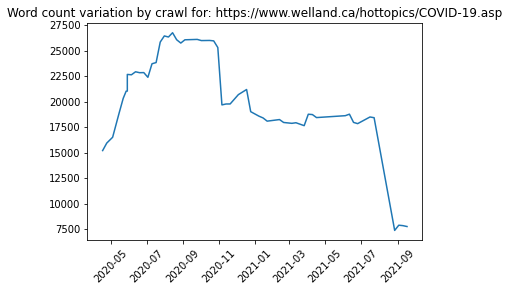

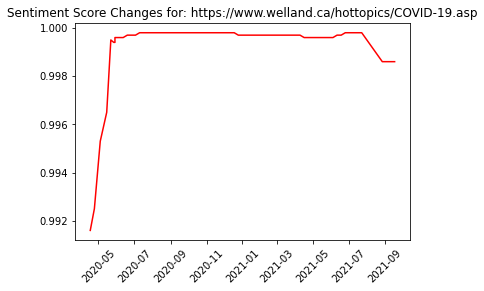

In [225]:
#@title Specific URL Data
url = "https://www.welland.ca/hottopics/COVID-19.asp" #@param {type:"string"}

#@markdown Be sure to hit the *run* button to confirm your selection

url_data = archive_data[archive_data.url == url]
url_data = url_data.sort_values(by="crawl_date")

#line plot of crawl date with length and v_comp

url_data = archive_data[archive_data.url == url]
url_data = url_data.sort_values(by="crawl_date")

plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for: " + url)
plt.show()


plt.plot(url_data['crawl_date'],url_data['v_comp'],color="red")
plt.xticks(rotation=45)
plt.title("Sentiment Score Changes for: " + url)
plt.show()





## View url history at Internet Archive

In [263]:
unique_days = url_data.groupby("length").first().sort_values(by='crawl_date')
#url_map = pd.DataFrame(columns=["crawl_date","length","score","link"])
url_map = pd.DataFrame(columns=["crawl_date","length","score","link"])
for row in unique_days.itertuples():
    date = row.crawl_date
    date =  str(date).split(' ')[0].replace('-','')
    length = len(row.content)
    score = row.v_comp
    line = []
    line.append(date)
    line.append(length)
    line.append(score)
    line.append(str("https://web.archive.org/web/" + date + "/" + url))
    line = pd.Series(line, index = url_map.columns)
    #print(line,"\n")
    url_map.append(line, ignore_index=True)

url_map


,crawl_date,length,score,link
